Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\ranac\Downloads\archive (14)\diabetes2.csv")           
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

Checking for the null values

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null Values found 

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


checking the correlation between the input features

<AxesSubplot:>

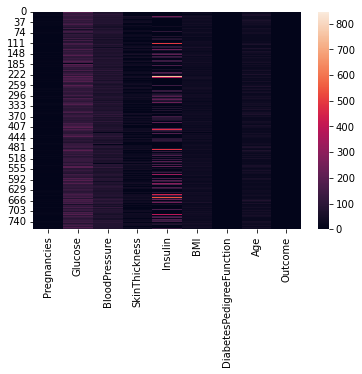

In [6]:
sns.heatmap(df)

Splitting the data into training and testing parts

In [7]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(['Outcome'] , axis = 1) , df['Outcome'] , test_size= 0.2)

Standardize features by removing the mean and scaling to unit variance

In [8]:
# class for standard scalar
scaler = StandardScaler()

#fitting
scaler.fit(x_train)

#transforming
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

The Logistic Regression Class

In [9]:
lor = LogisticRegression()

Fitting the data 
1. training data 
2. scaled training data

In [10]:
lor.fit(x_train,y_train)
lor.fit(x_train_scaled,y_train)

C:\Users\ranac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting the outcome using our ML model by feeding the training data

In [11]:
train_pred = lor.predict(x_train)
test_pred = lor.predict(x_test)
accuracy_score(train_pred,y_train)

C:\Users\ranac\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\ranac\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.34527687296416937

The accuracy is very low because features are not standarized

Predicting the outcome by feeding scaled training data into the ML model

In [12]:
x_train_scaled_pred = lor.predict(x_train_scaled)
accuracy_score(x_train_scaled_pred,y_train)

0.7801302931596091

Since we have only 768 datapoints hence 78% accuracy is not bad. We can now feed our model the testing data 

In [13]:
x_test_scaled_pred = lor.predict(x_test_scaled)
accuracy_score(x_test_scaled_pred ,y_test)

0.7662337662337663

Accuracy when trained on the testing data was found 76.6%.